# 1. Visualize Numbers 

Import libraries

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

Load digits

In [9]:
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [10]:
digits.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

Visualize numbers

In [11]:
def visualize_numbers(axes):
    for item in zip(axes.ravel(), digits.images, digits.target):
        axes, image, target = item
        axes.imshow(image, cmap=plt.cm.gray_r)

        axes.set_xticks([])
        axes.set_yticks([])

        axes.set_title(target)
    plt.tight_layout()

1.1 24 numbers

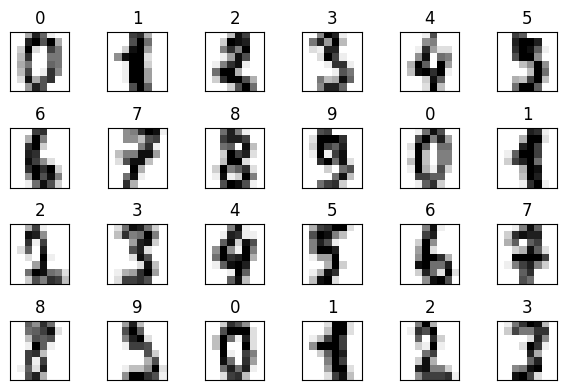

In [12]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))
visualize_numbers(axes)

1.2 36 numbers

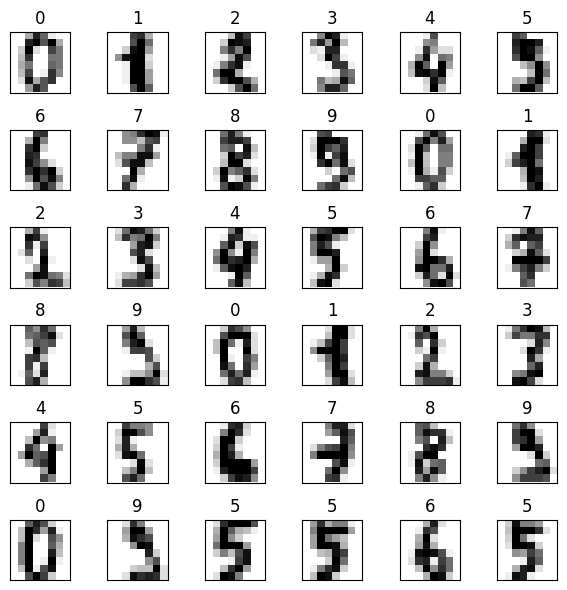

In [13]:
figure, axes = plt.subplots(nrows=6, ncols=6, figsize=(6, 6))
visualize_numbers(axes)

# 2. Train and Test Split

Import libraries

In [14]:
from sklearn.model_selection import train_test_split

Create test and train split with 25 to 75 ratio

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=11, test_size=0.25
)

In [16]:
X_train.shape

(1347, 64)

In [17]:
X_test.shape

(450, 64)

# 3 Create and Teach the Model

Import libraries

In [18]:
from sklearn.neighbors import KNeighborsClassifier

Create and train classifier

In [24]:
knn = KNeighborsClassifier()
knn.fit(X=X_train, y=y_train)


KNeighborsClassifier()

# 4. Predicting Values

In [29]:
predicted = knn.predict(X=X_test)
expected = y_test

# 5. Compare Predicted and Expected Values

In [68]:
predicted[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [69]:
expected[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

Define function for plotting values

In [121]:
def compare_values(predicted_values, expected_values, figure_size: tuple = None) -> None:
  plt.figure(figsize=figure_size)
  differences = [abs(p - e) for p, e in zip(predicted_values, expected_values)]
  colors = ['blue' if d == 0 else 'red' for d in differences] 

  plt.scatter(range(len(predicted_values)), predicted_values, c=colors, label="Predicted")
  plt.scatter(range(len(expected_values)), expected_values, c='gray', alpha=0.5, label="Expected")
  plt.xlabel("Index")
  plt.ylabel("Value")
  plt.title("Comparison of Predicted and Expected Values")
  plt.legend()

5.1 Compare 20 values

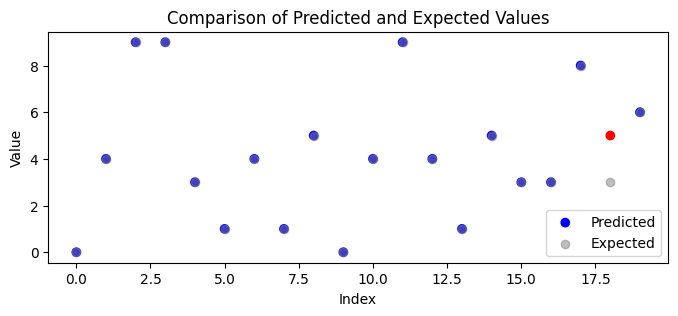

In [127]:
compare_values(predicted_values=predicted[:20], expected_values=expected[:20], figure_size=[8, 3])


5.2 Compare 24 values

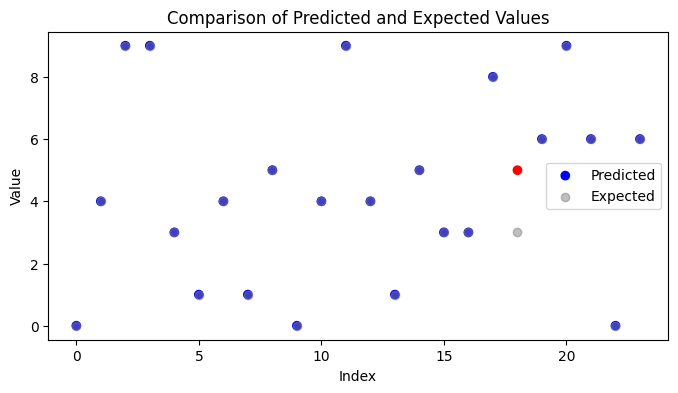

In [123]:
compare_values(predicted_values=predicted[:24], expected_values=expected[:24], figure_size=[8,4])

5.3 Compare 36 values

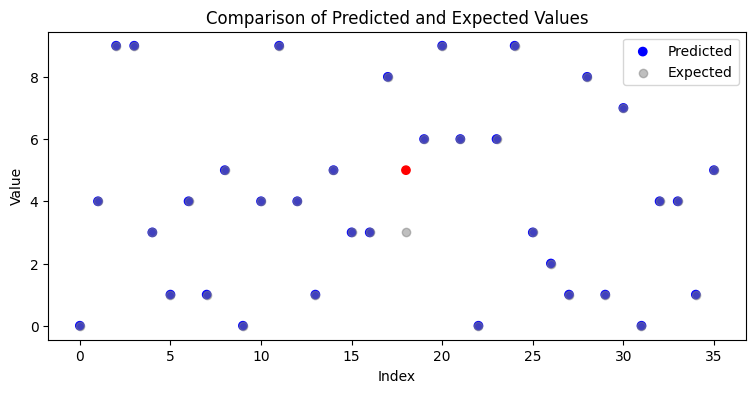

In [124]:
compare_values(predicted_values=predicted[:36], expected_values=expected[:36], figure_size=[9,4])

# 6. Analysing the Result

Import libraries

In [ ]:
from sklearn.metrics import confusion_matrix

6.1 `knn.score` method

In [134]:
print(f"The accuracy is {knn.score(X=X_test, y=y_test):.2%}")

The accuracy is 97.78%


6.2 Confusion matrix